In [101]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage, TextArea
import pandas as pd
from time import sleep
from IPython.display import clear_output
import os

In [102]:
data = pd.read_csv('performances.csv')
data.head()

,group,round,player,choice,attendance,score,ac_score
0,Grupo-0001,1,jugador1a,1,2,-1,22
1,Grupo-0001,1,jugador2a,1,2,-1,22
2,Grupo-0001,2,jugador2a,1,1,1,22
3,Grupo-0001,2,jugador1a,0,1,0,22
4,Grupo-0001,3,jugador2a,0,1,0,22


In [113]:
def pintar_ronda(data,grupo,hasta_ronda,color='black'):
    grupos = data['group'].unique().tolist()
    datos = data.groupby('group').get_group(grupos[grupo])
    jugadores = datos['player'].unique().tolist()
    jugadas_pl1 = datos.groupby('player')['choice'].get_group(jugadores[0]).to_list()
    jugadas_pl2 = datos.groupby('player')['choice'].get_group(jugadores[1]).to_list()
    fig, axes = plt.subplots(figsize=(10,2))
    step = 1/50
    tangulos = []
    ruta = 'para_videos/' + str(grupos[grupo])
    for r in range(hasta_ronda):
        if jugadas_pl1[r-1] == 1:
            tangulos.append(
                patches.Rectangle(
                    (r*step,0.5),step,0.5,
                    facecolor=color
                )
            )
        else:
            tangulos.append(
                patches.Rectangle(
                    (r*step,0.5),step,0.5,
                    facecolor='white',
                    edgecolor='gray'
                )
            )
        if jugadas_pl2[r-1] == 1:
            tangulos.append(
                patches.Rectangle(
                    (r*step,0),step,0.5,
                    facecolor=color
                )
            )
        else:
            tangulos.append(
                patches.Rectangle(
                    (r*step,0),step,0.5,
                    facecolor='white',
                    edgecolor='gray'
                )
            )
            
        
        
        
            
    for t in tangulos:
        axes.add_patch(t)
    axes.axis('off')
    
    
    
    try:
        os.makedirs(ruta)
    except:
        pass
    
    
    if hasta_ronda == 49:
        pass
   
    return ruta
    
    
    
    
            

<ipython-input-113-df4b36ccdb39>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(figsize=(10,2))


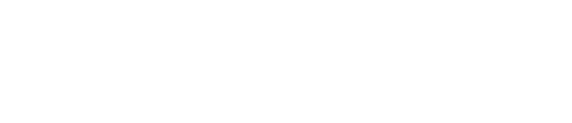

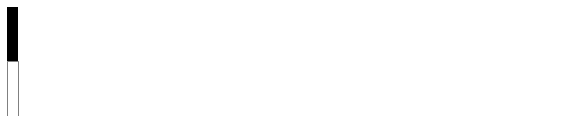

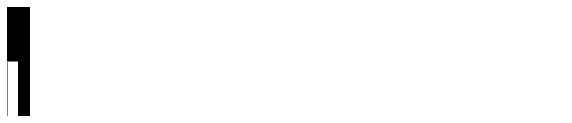

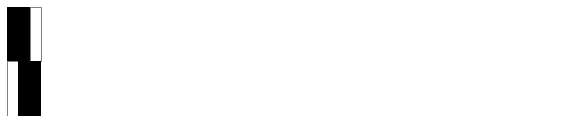

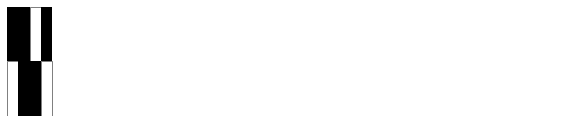

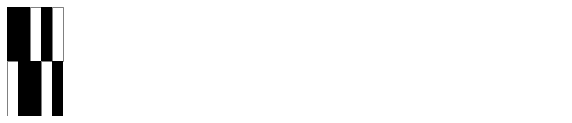

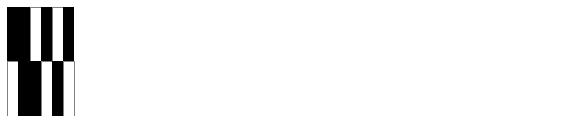

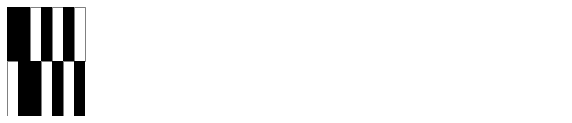

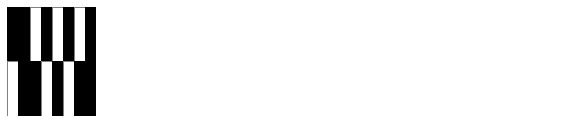

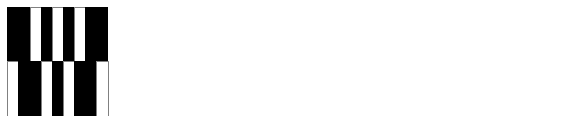

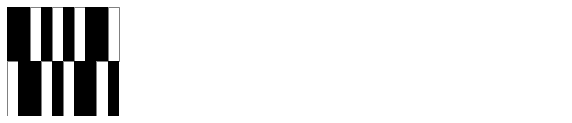

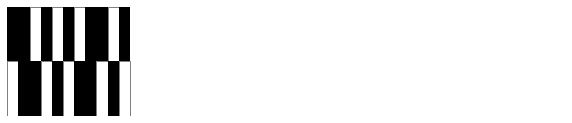

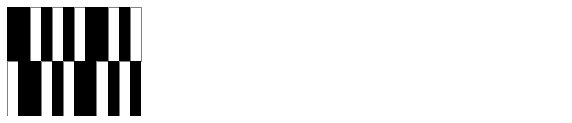

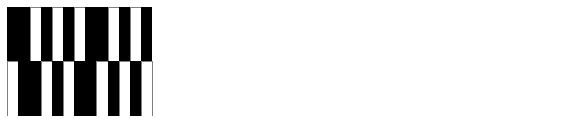

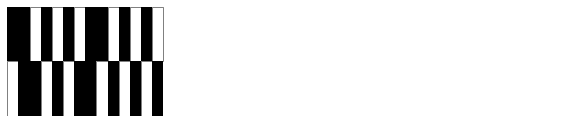

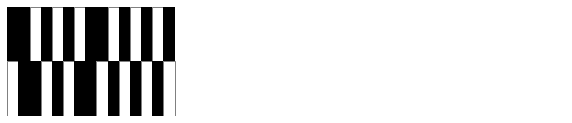

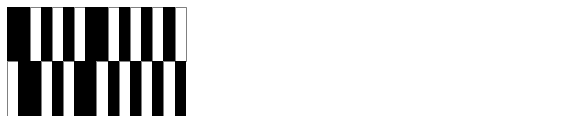

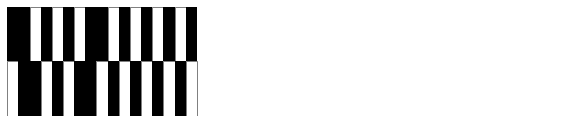

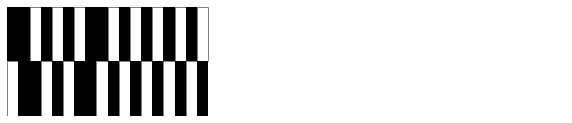

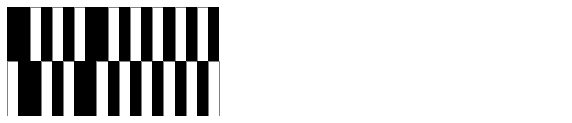

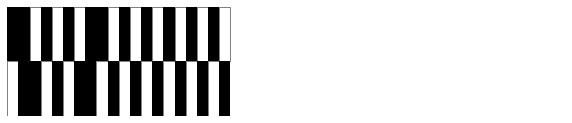

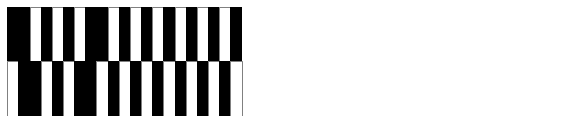

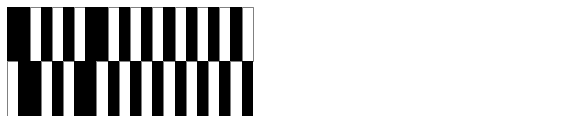

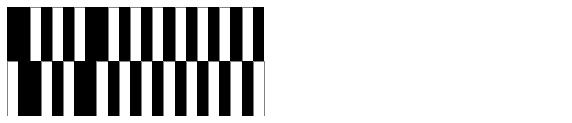

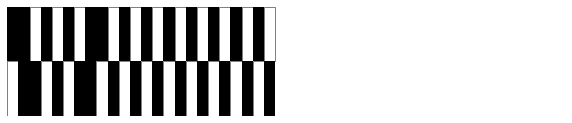

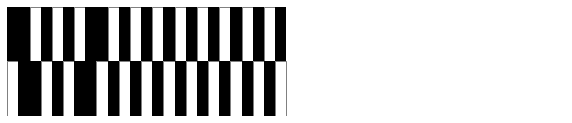

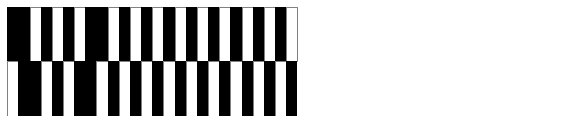

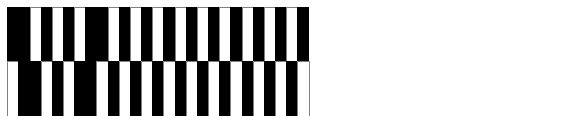

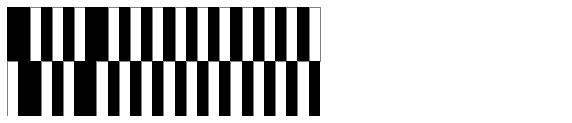

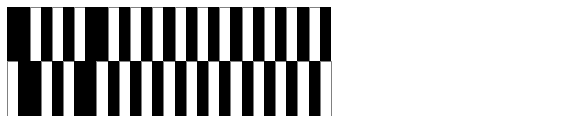

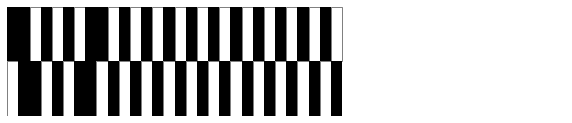

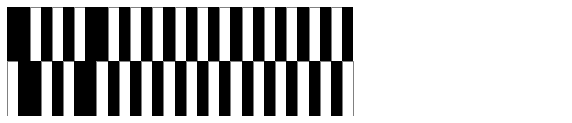

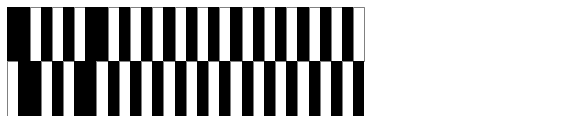

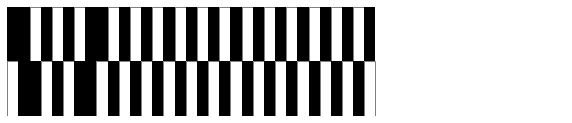

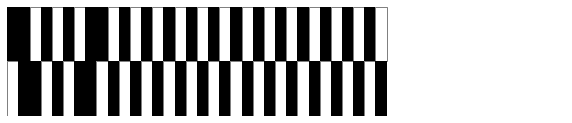

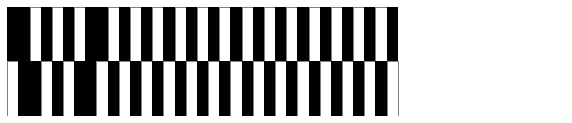

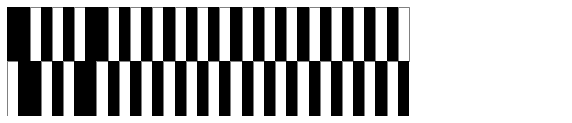

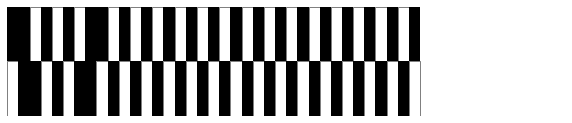

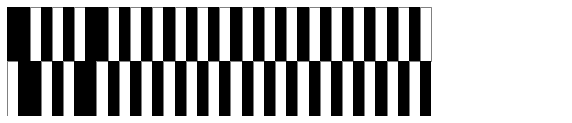

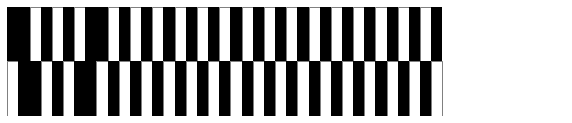

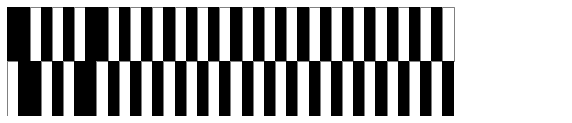

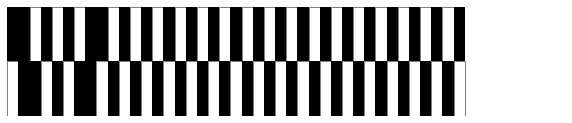

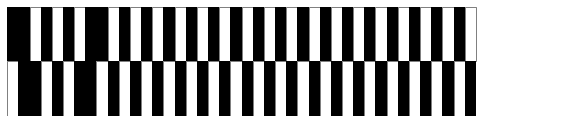

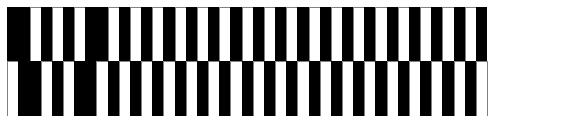

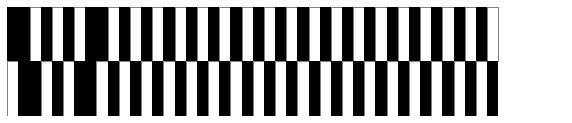

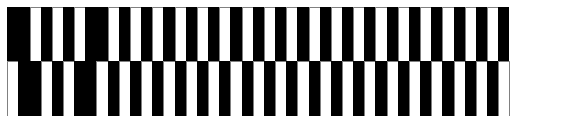

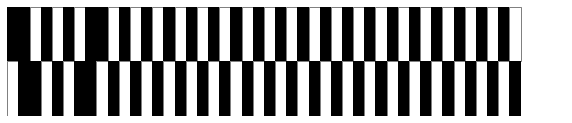

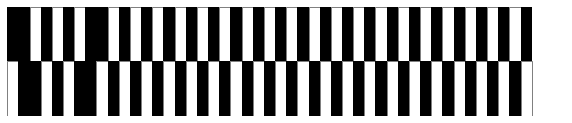

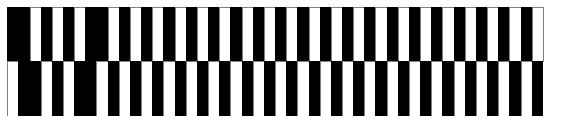

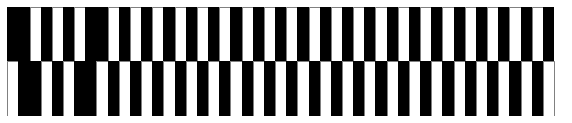

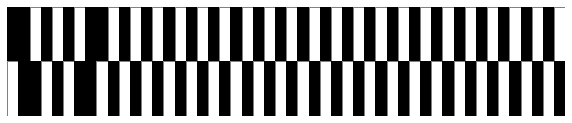

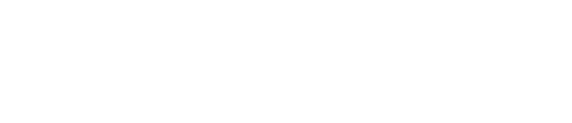

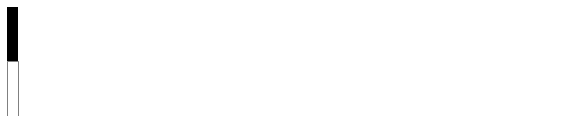

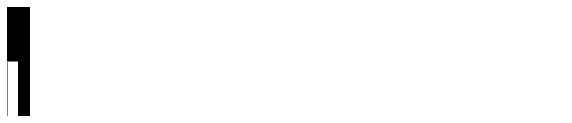

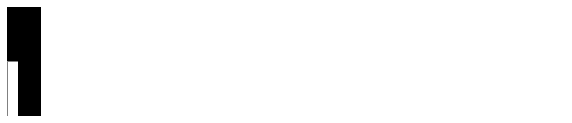

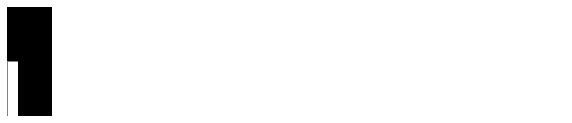

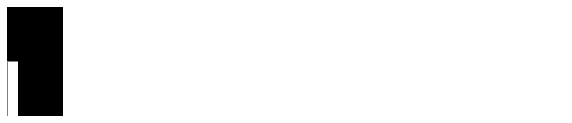

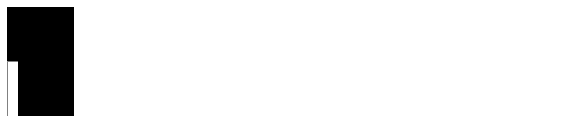

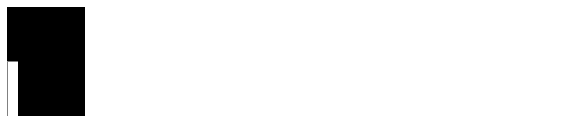

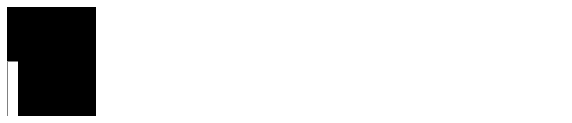

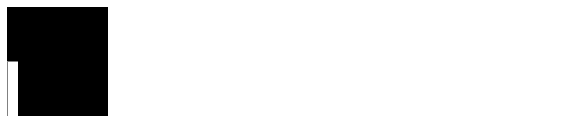

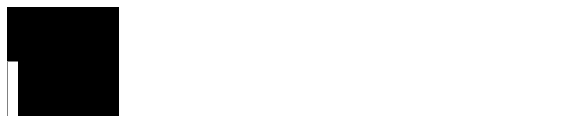

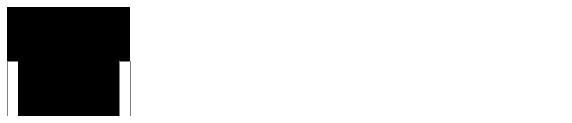

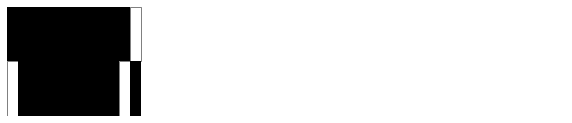

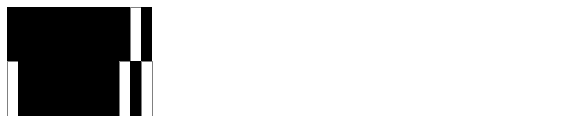

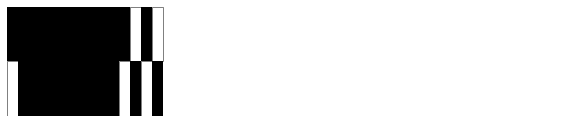

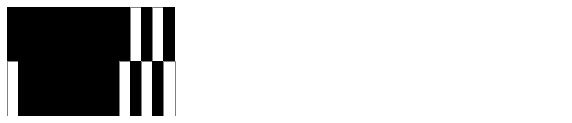

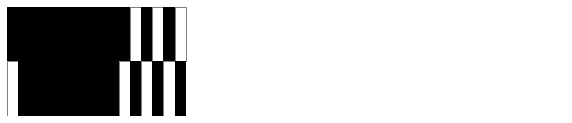

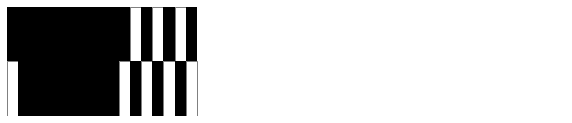

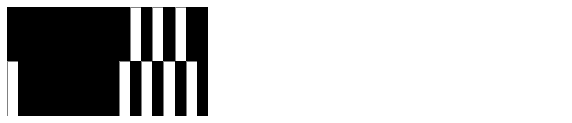

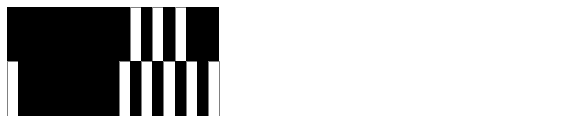

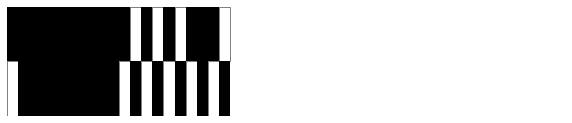

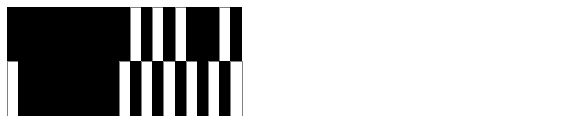

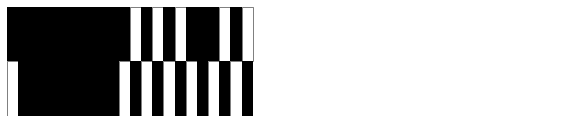

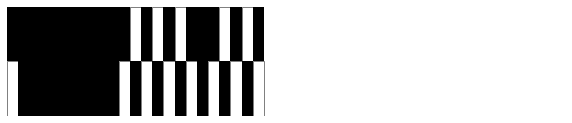

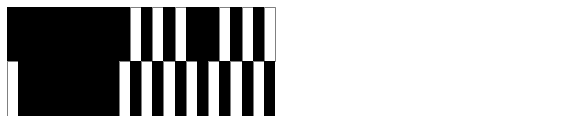

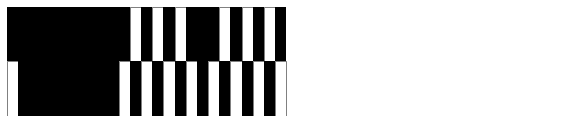

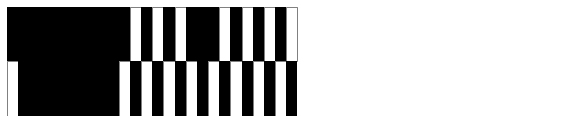

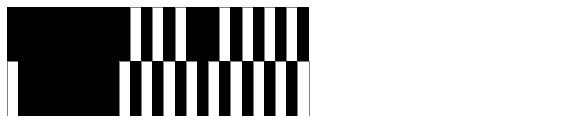

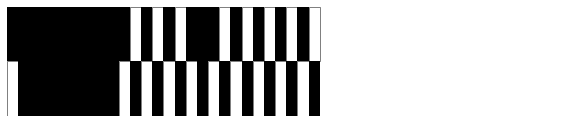

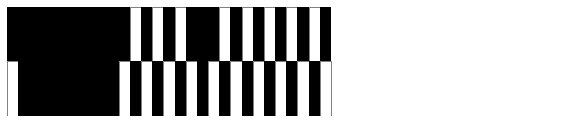

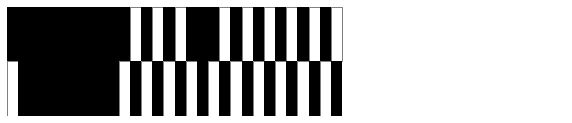

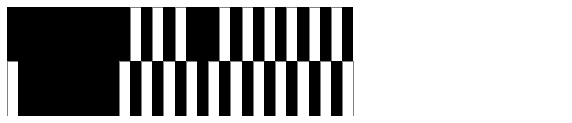

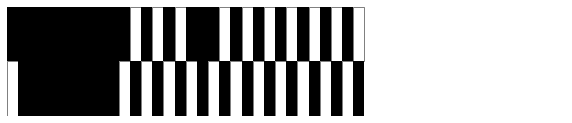

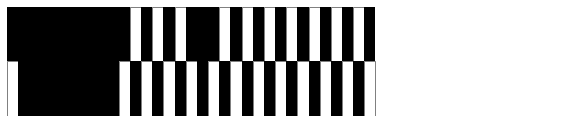

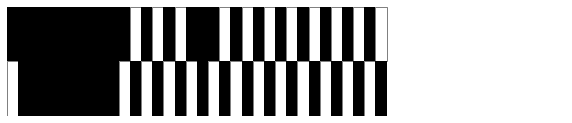

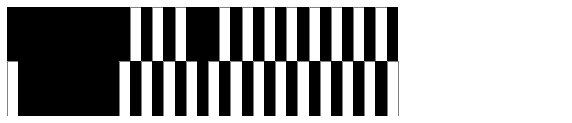

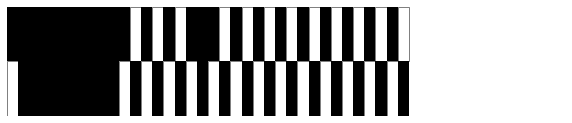

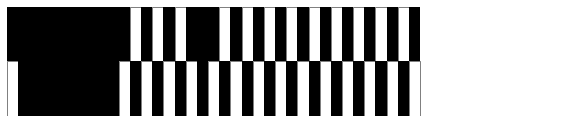

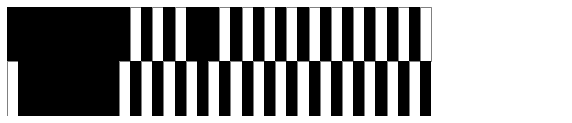

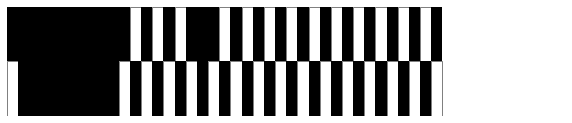

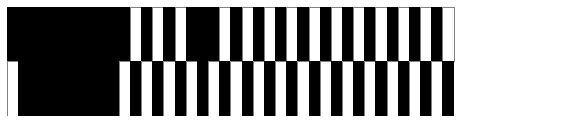

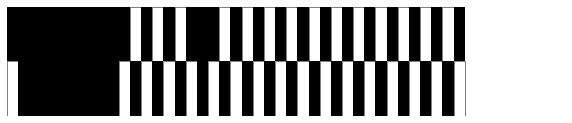

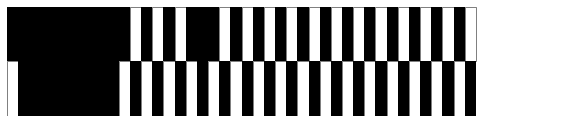

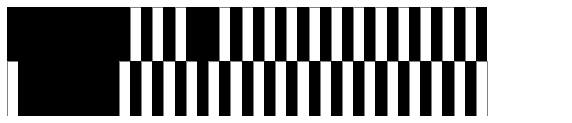

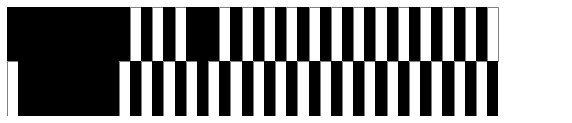

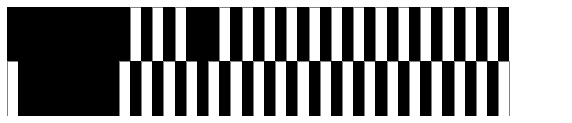

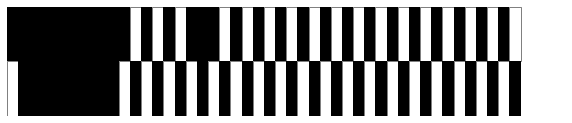

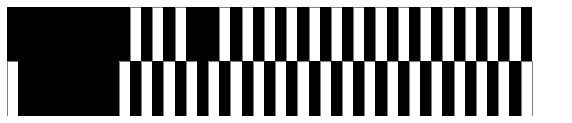

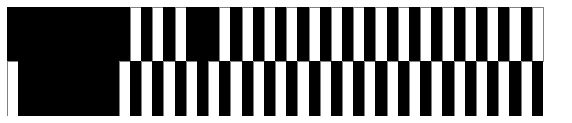

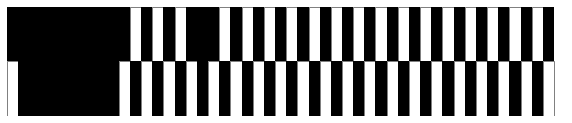

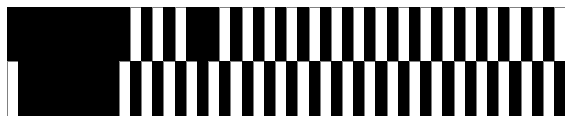

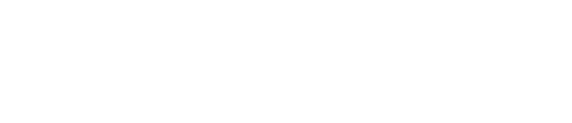

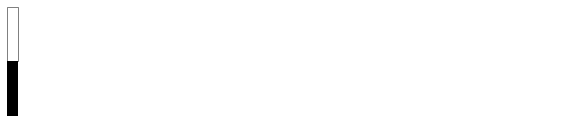

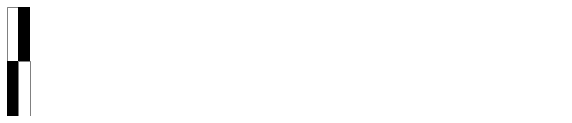

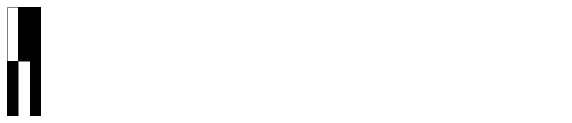

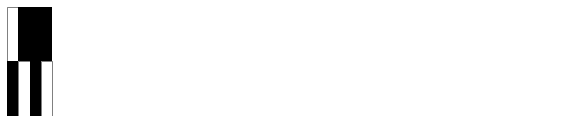

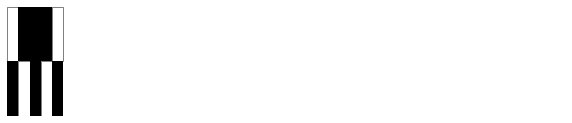

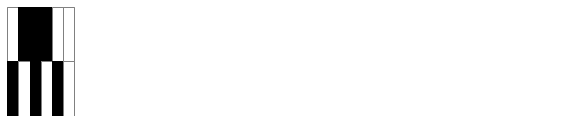

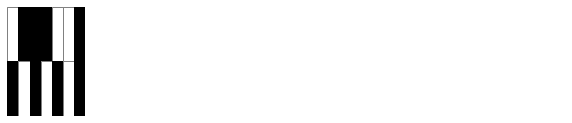

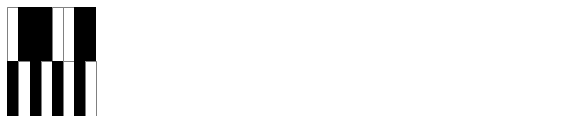

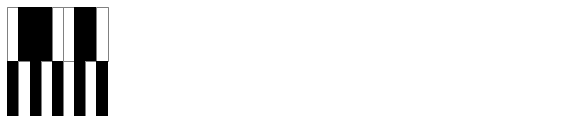

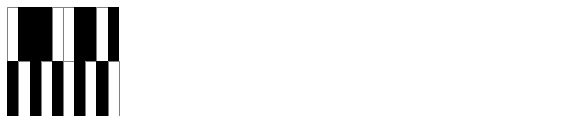

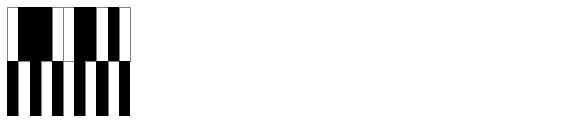

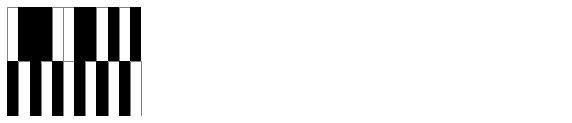

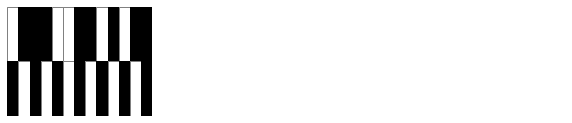

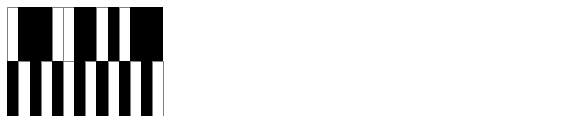

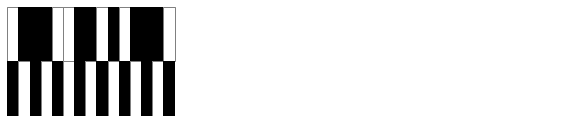

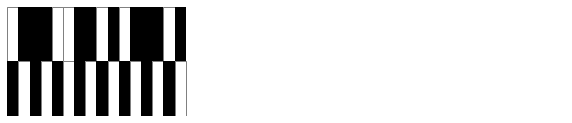

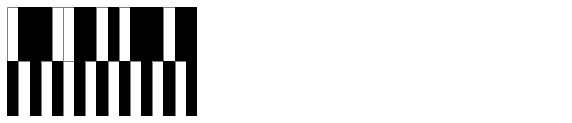

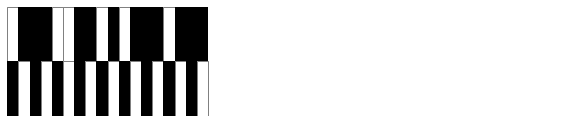

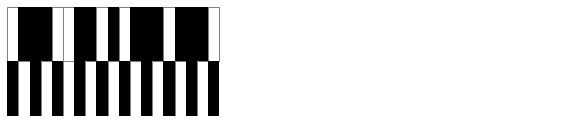

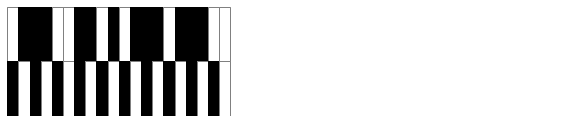

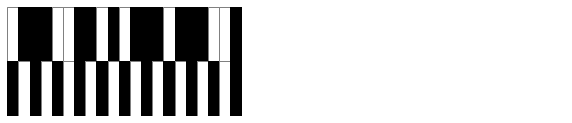

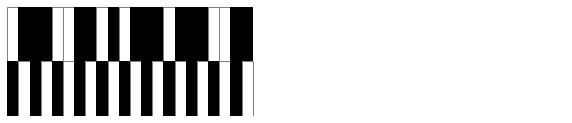

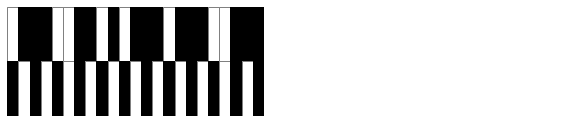

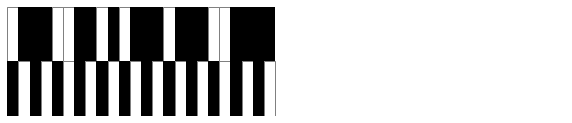

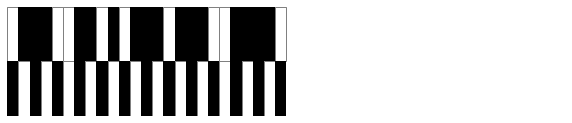

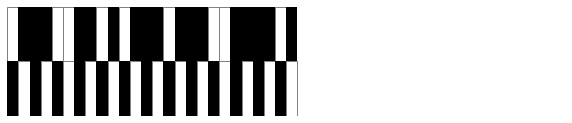

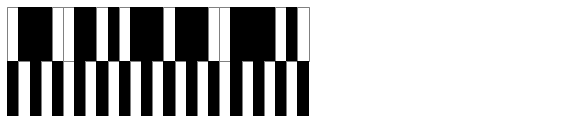

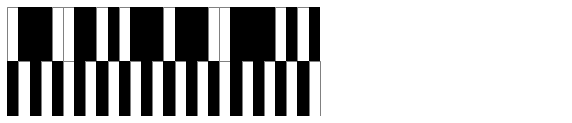

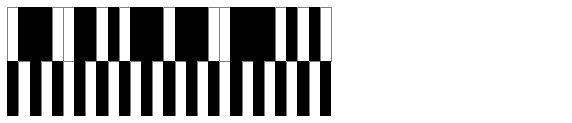

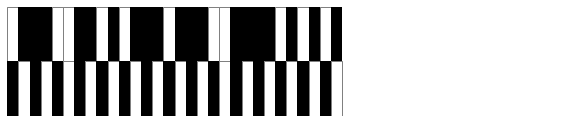

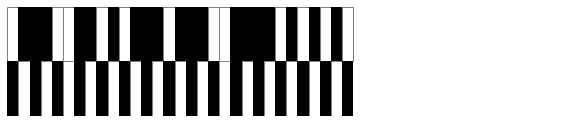

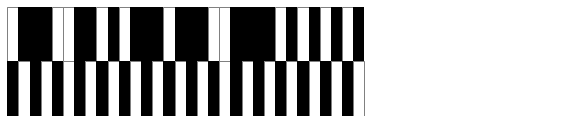

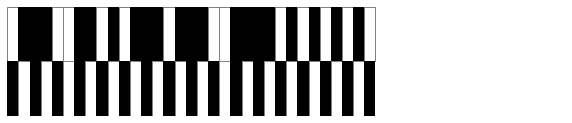

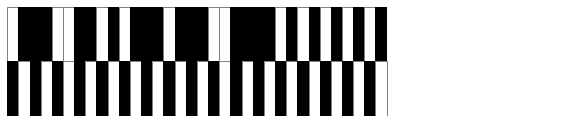

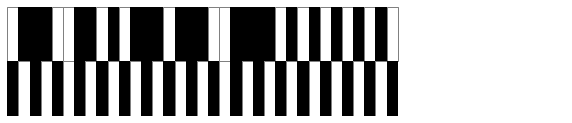

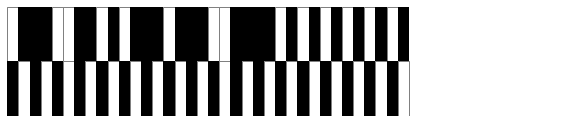

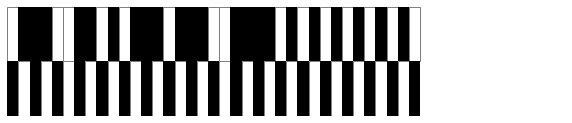

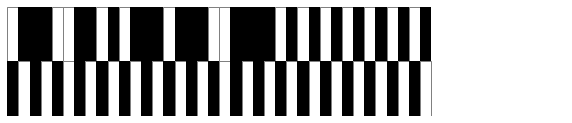

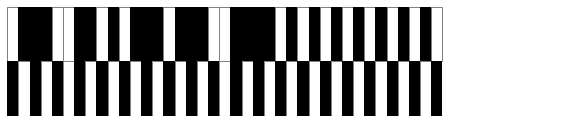

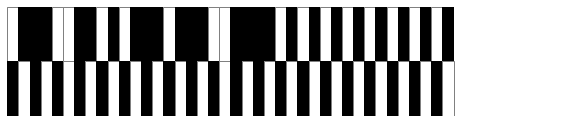

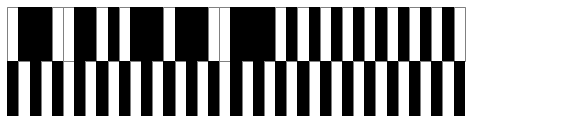

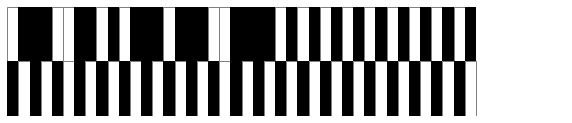

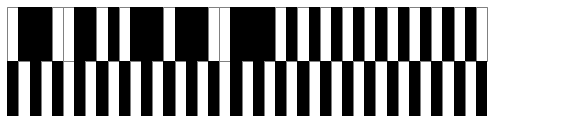

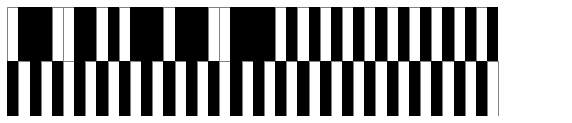

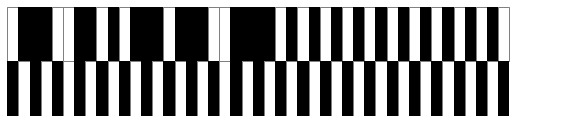

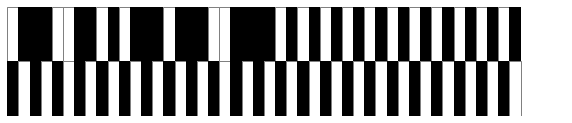

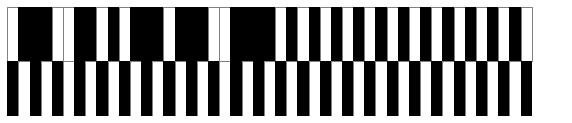

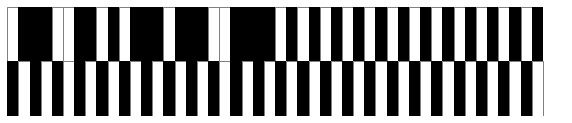

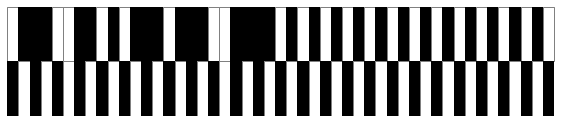

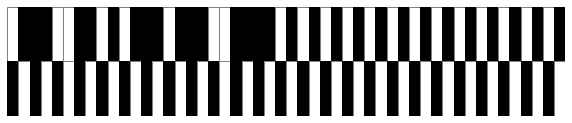

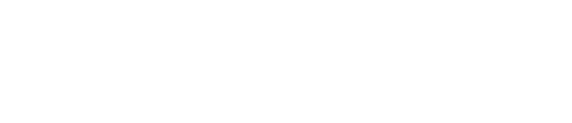

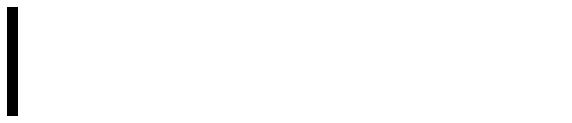

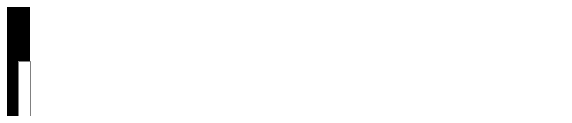

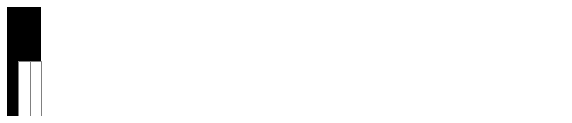

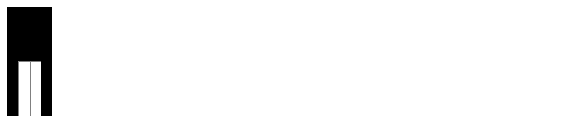

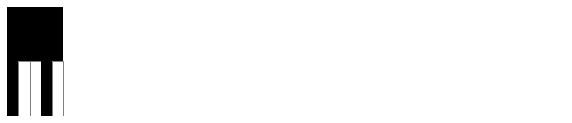

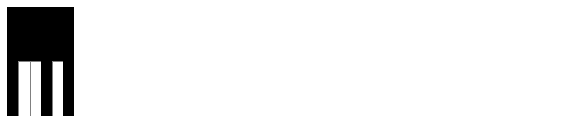

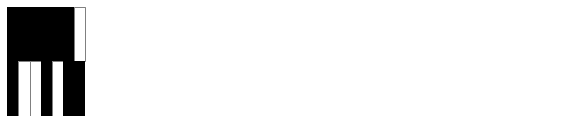

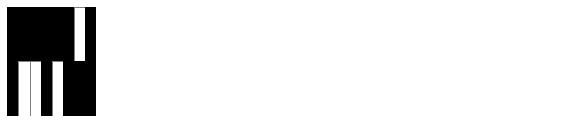

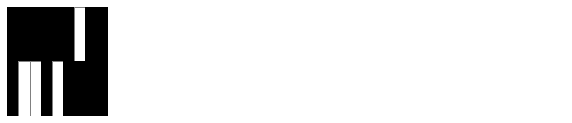

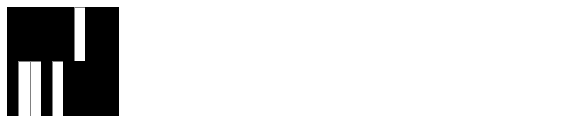

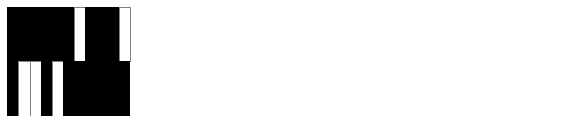

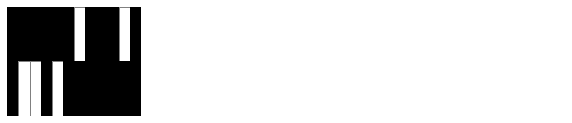

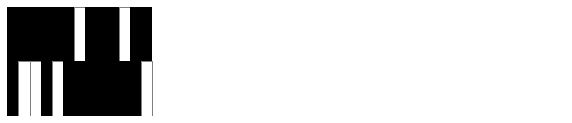

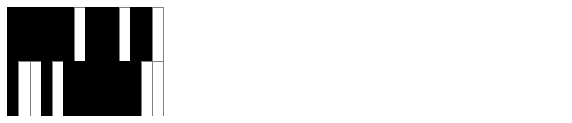

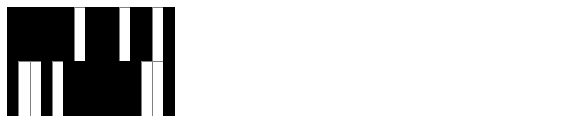

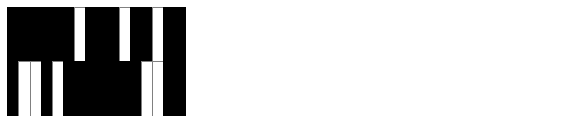

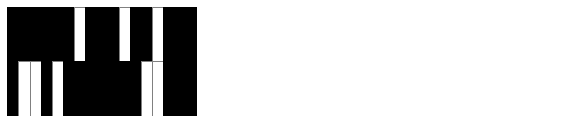

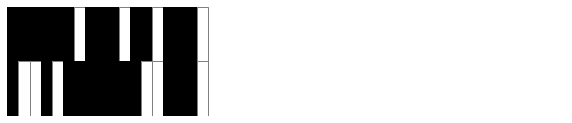

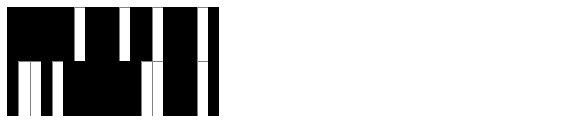

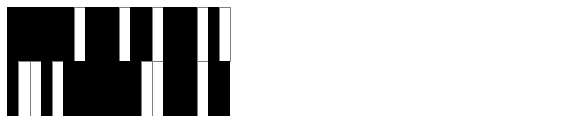

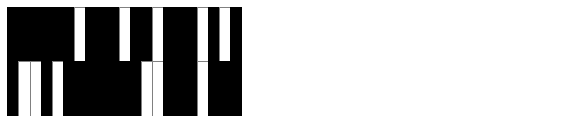

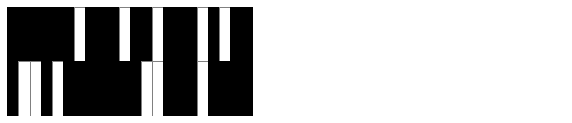

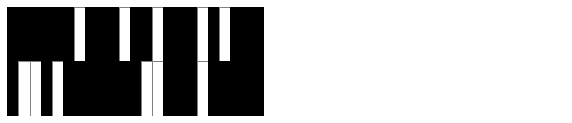

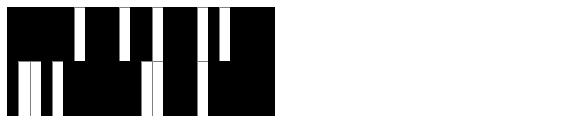

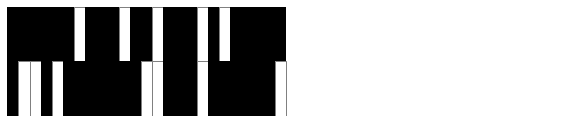

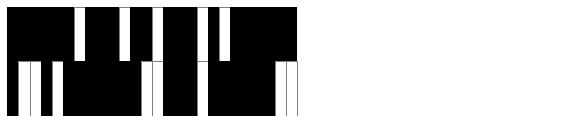

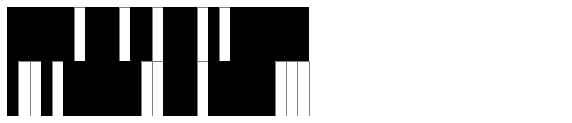

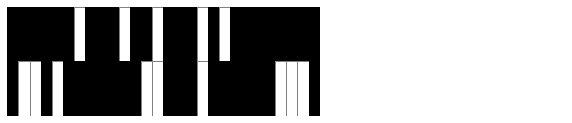

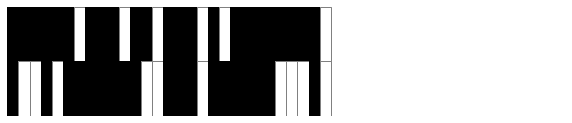

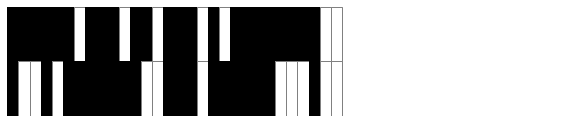

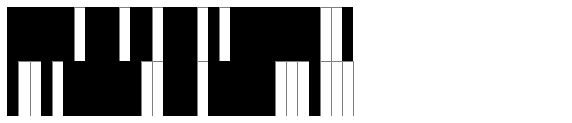

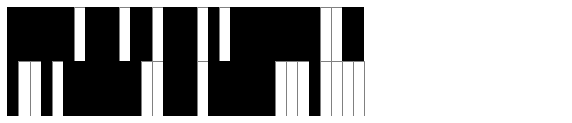

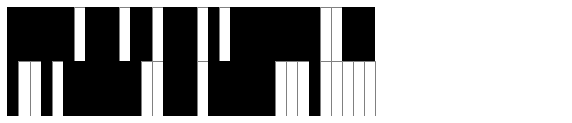

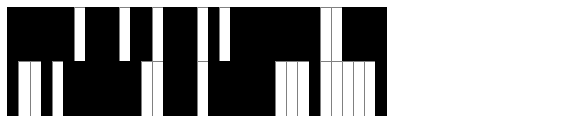

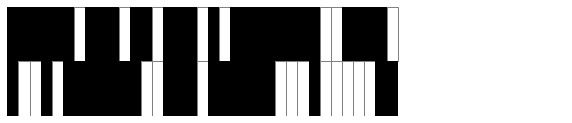

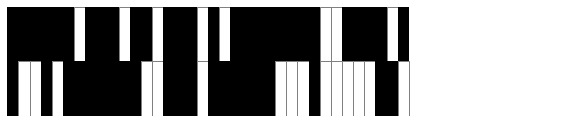

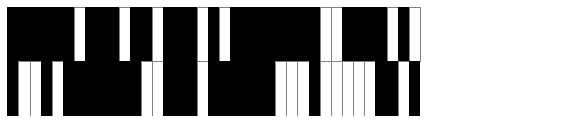

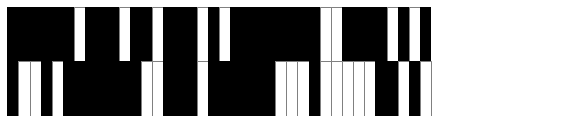

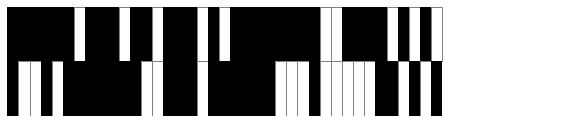

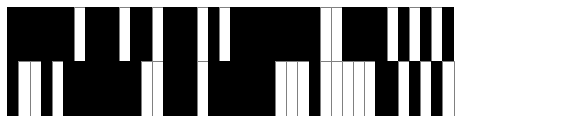

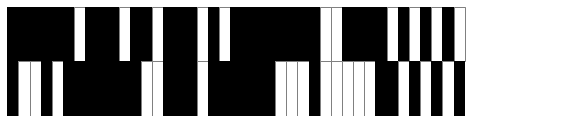

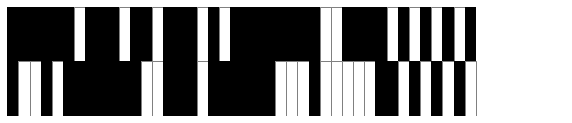

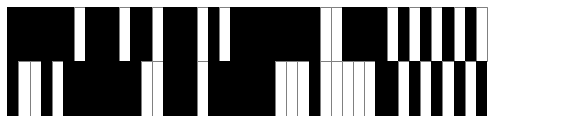

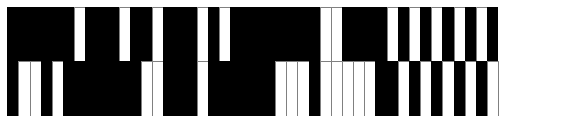

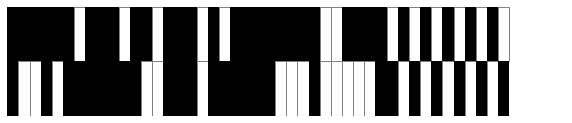

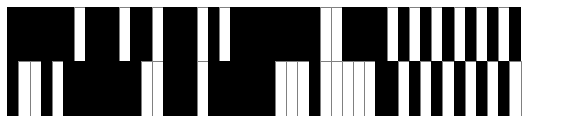

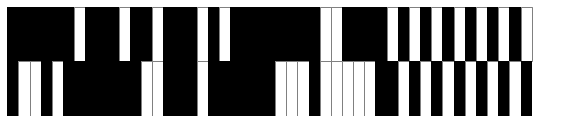

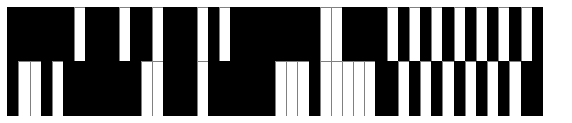

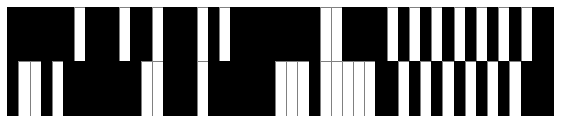

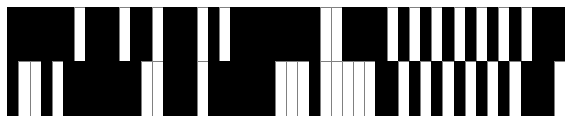

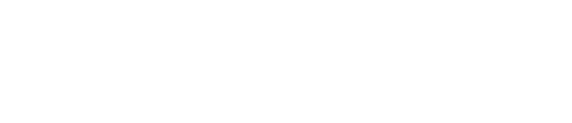

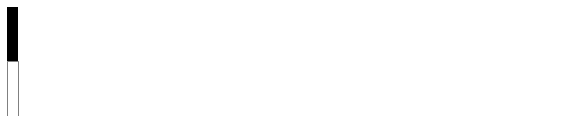

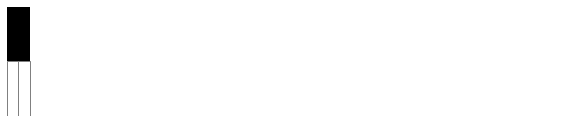

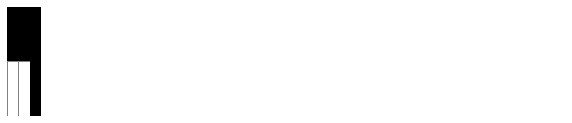

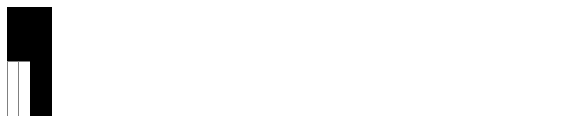

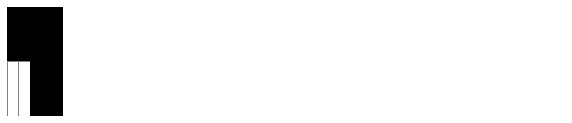

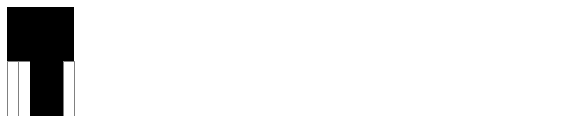

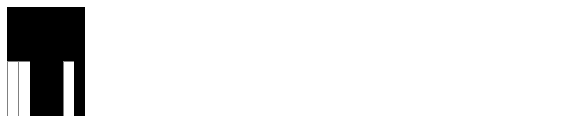

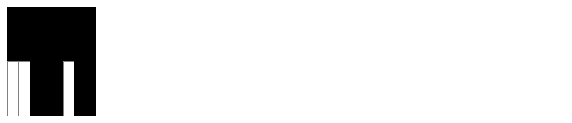

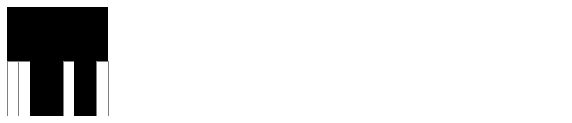

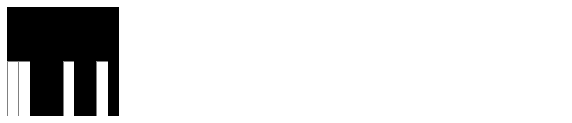

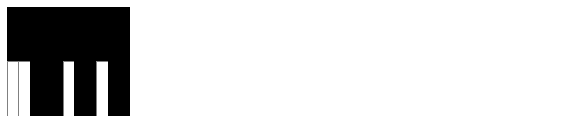

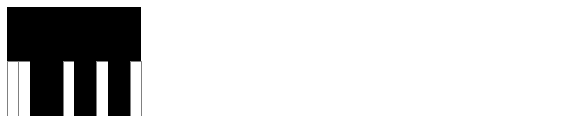

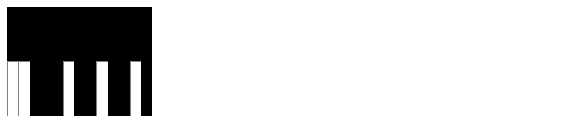

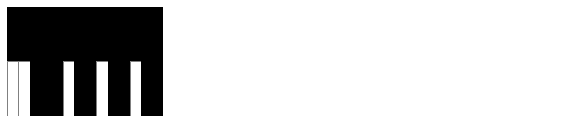

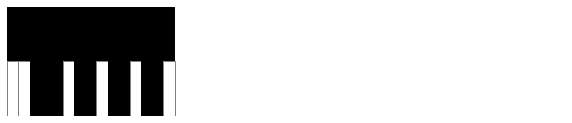

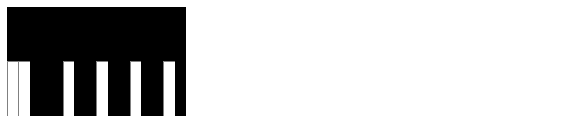

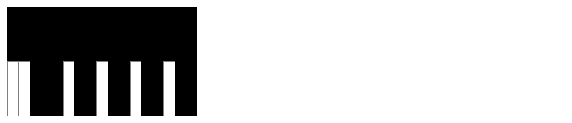

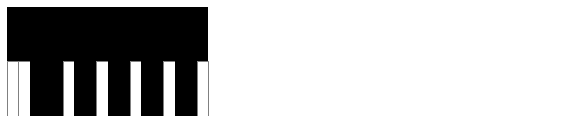

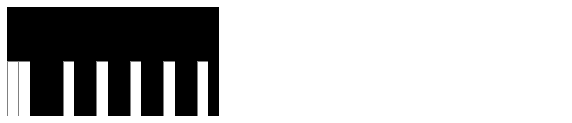

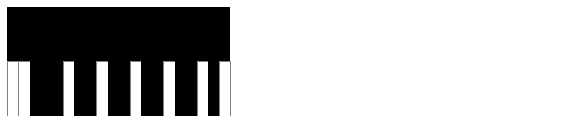

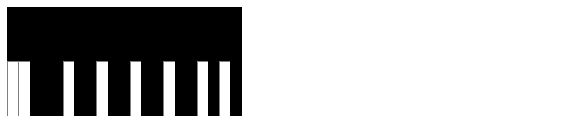

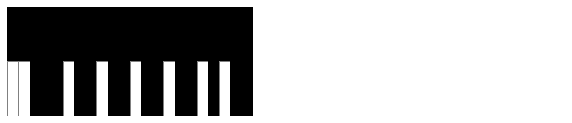

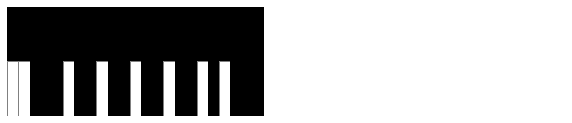

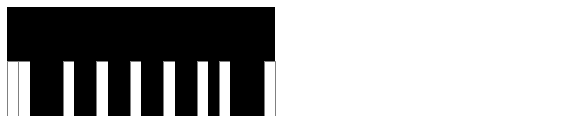

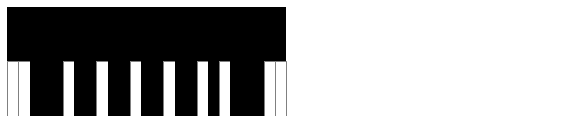

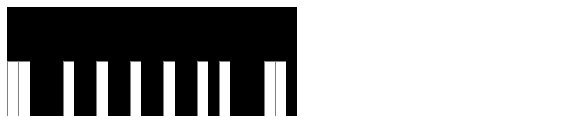

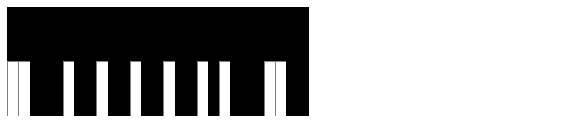

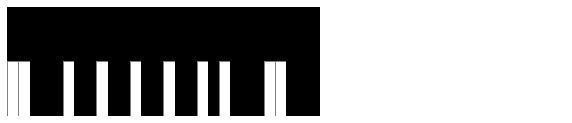

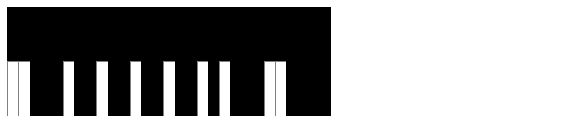

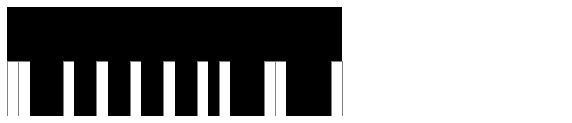

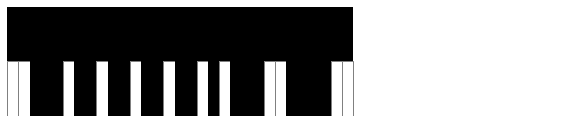

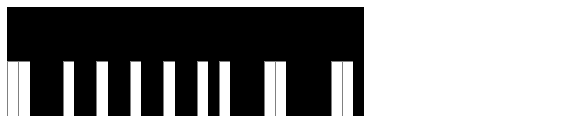

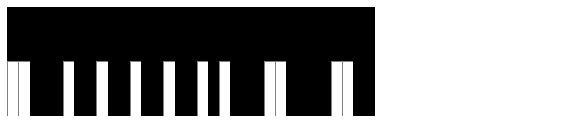

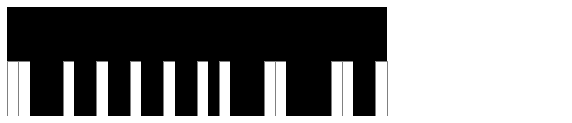

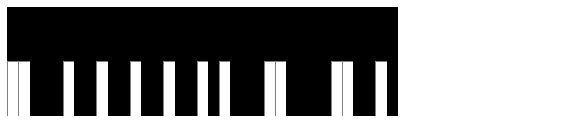

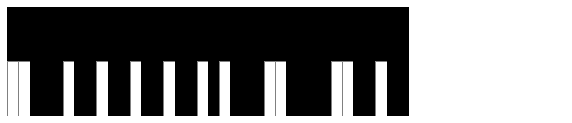

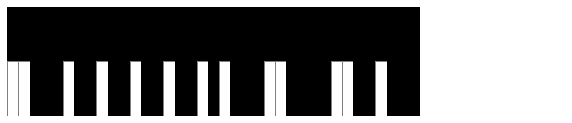

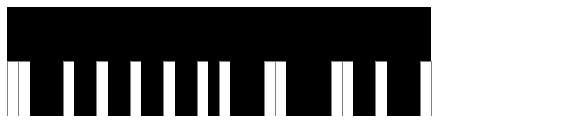

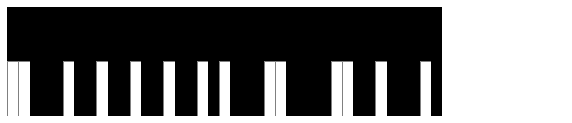

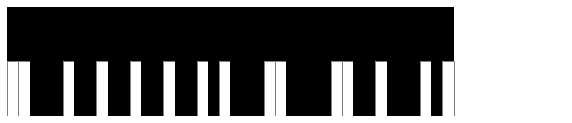

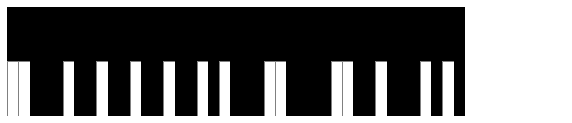

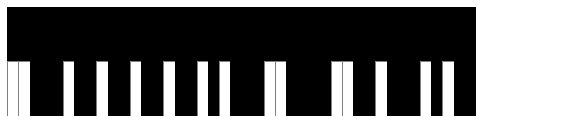

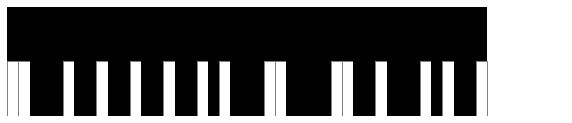

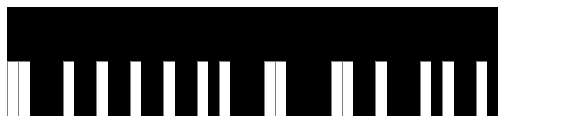

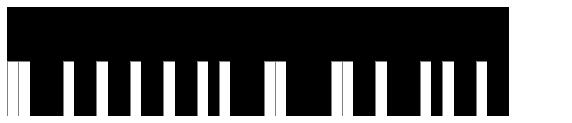

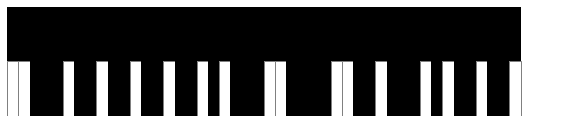

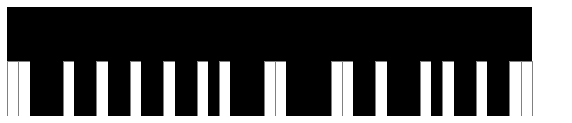

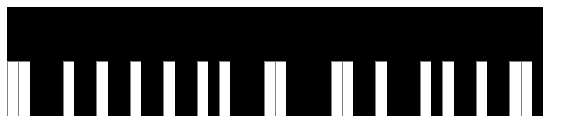

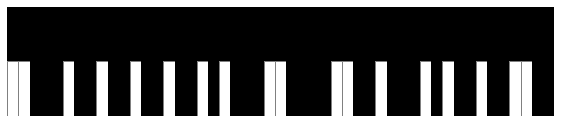

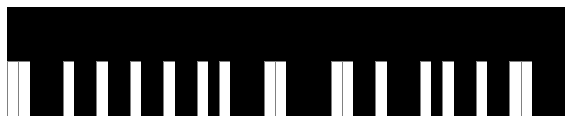

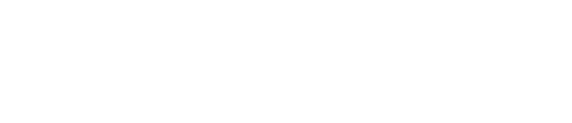

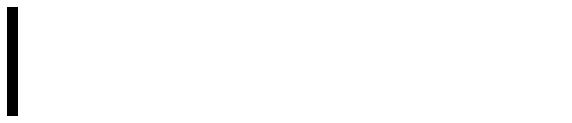

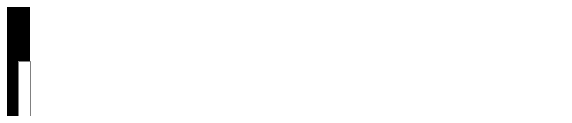

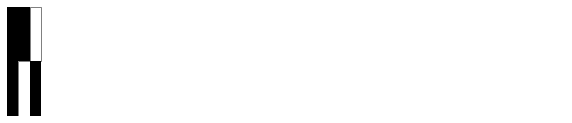

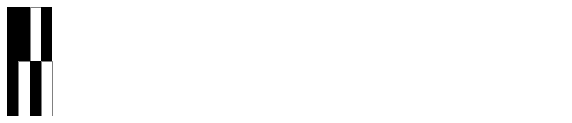

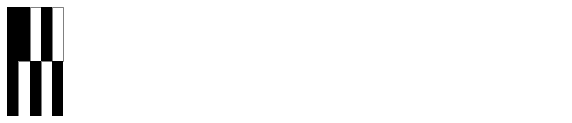

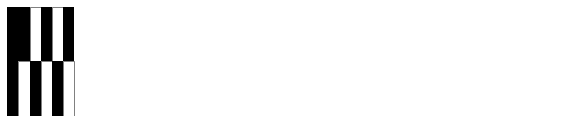

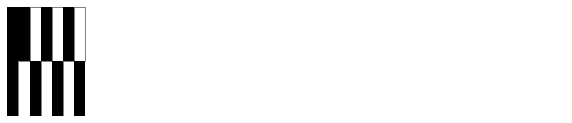

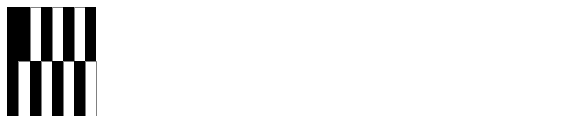

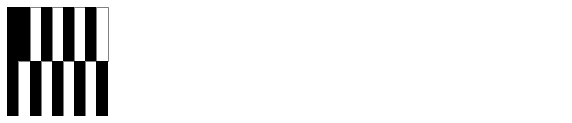

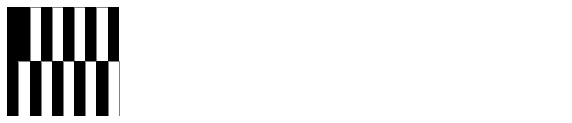

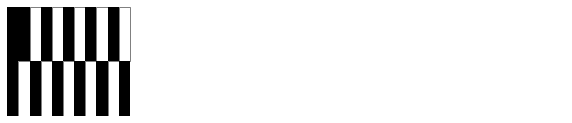

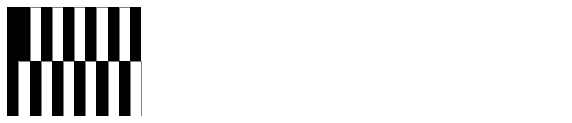

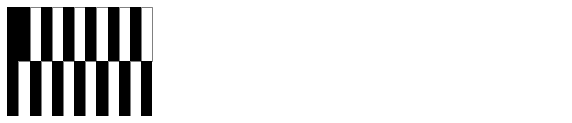

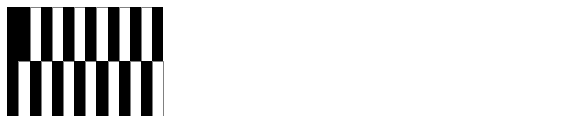

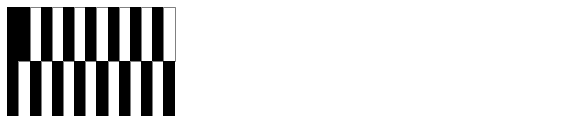

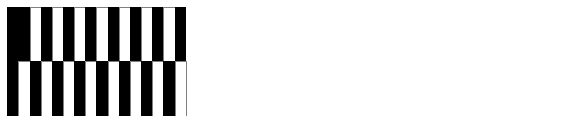

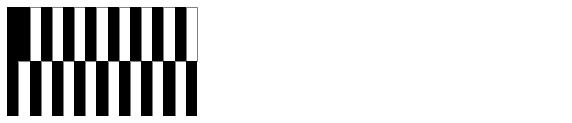

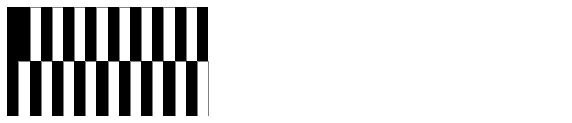

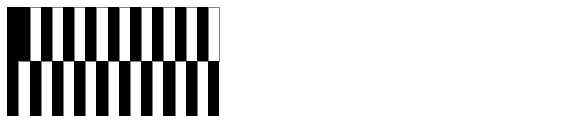

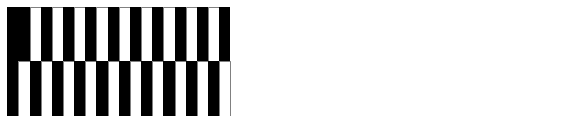

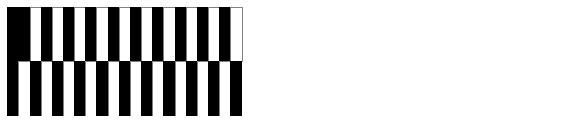

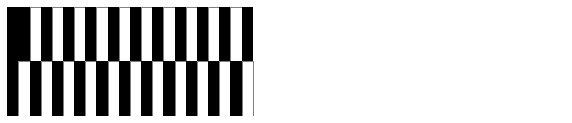

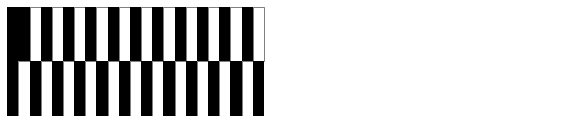

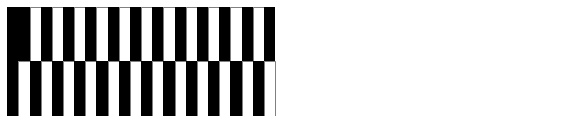

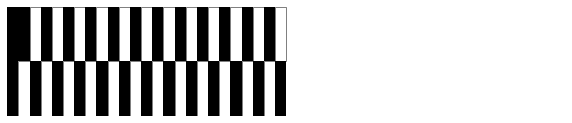

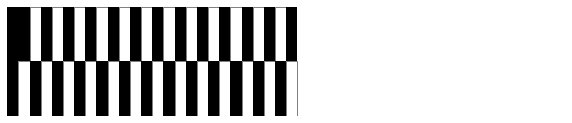

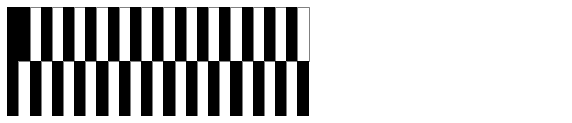

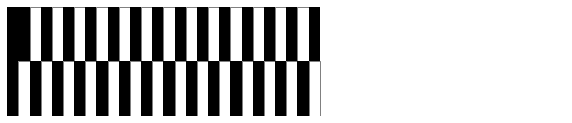

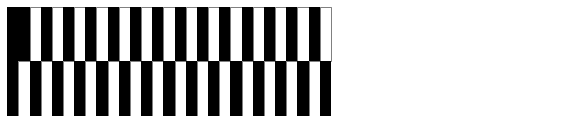

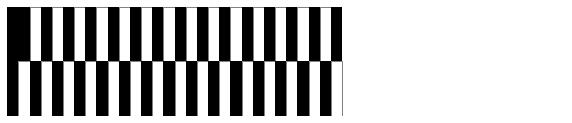

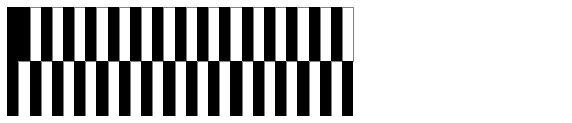

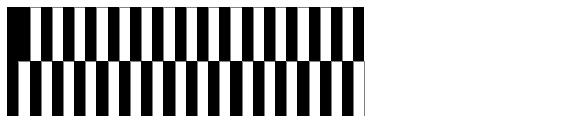

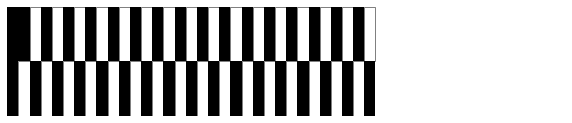

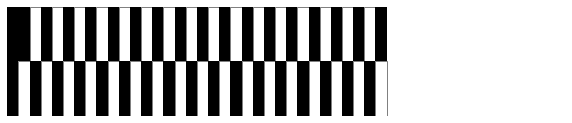

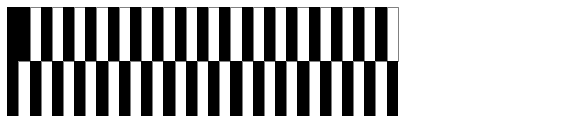

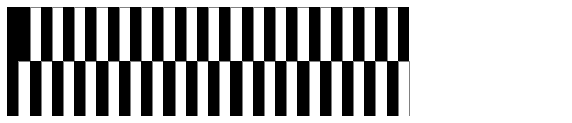

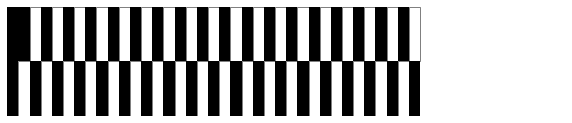

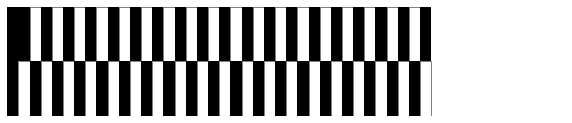

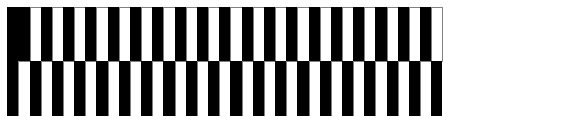

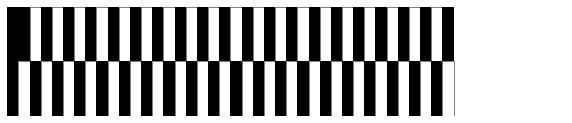

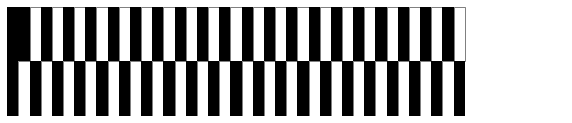

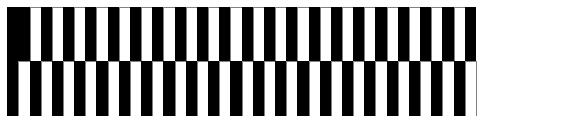

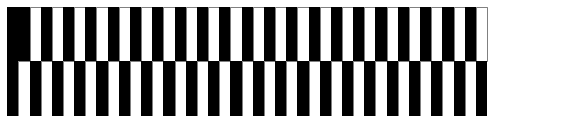

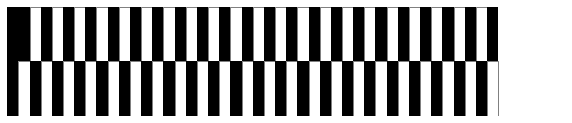

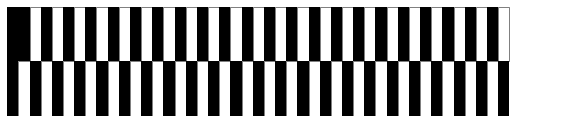

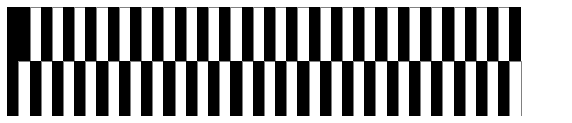

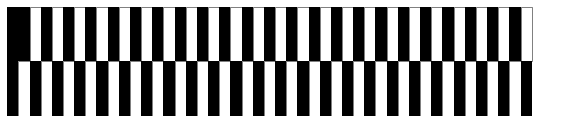

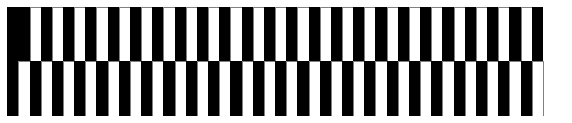

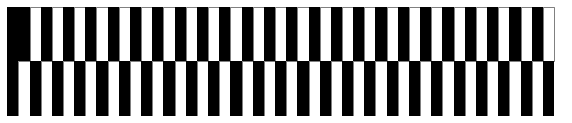

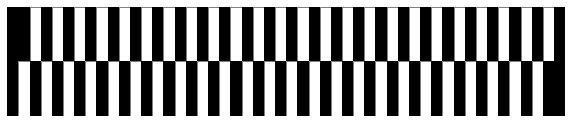

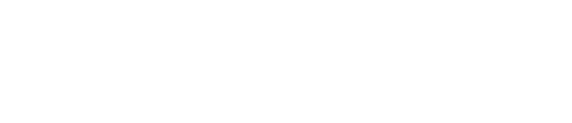

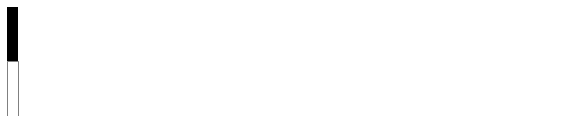

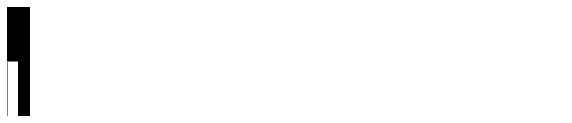

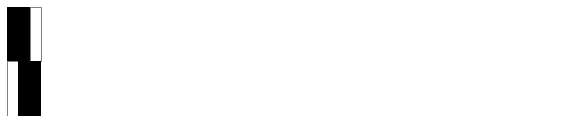

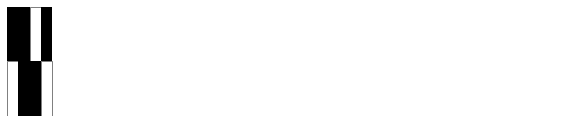

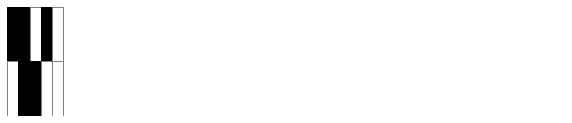

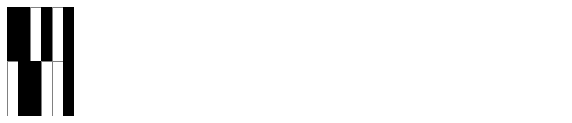

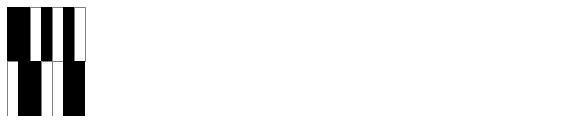

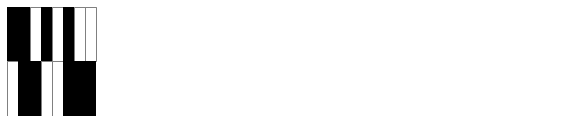

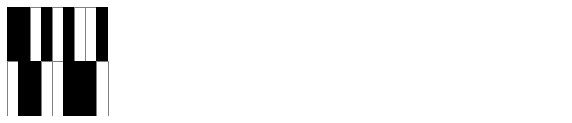

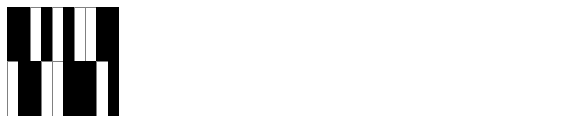

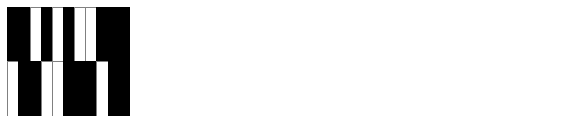

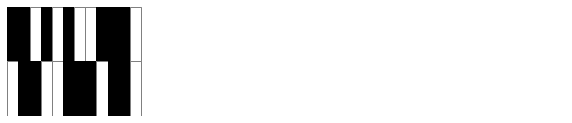

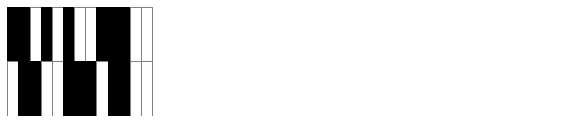

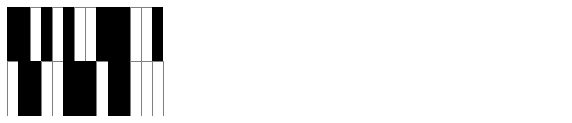

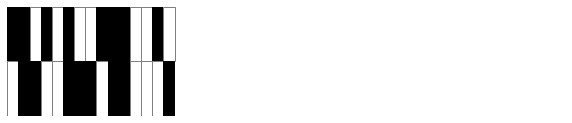

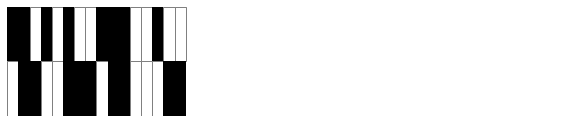

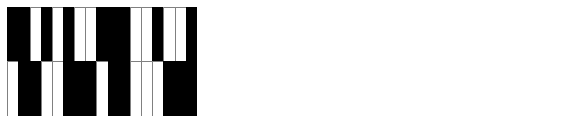

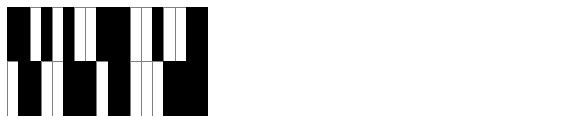

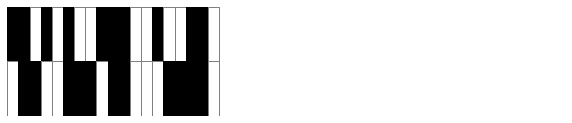

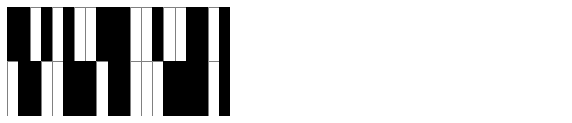

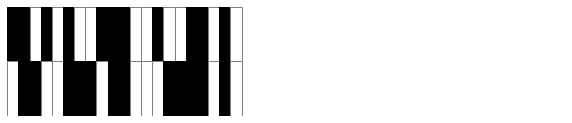

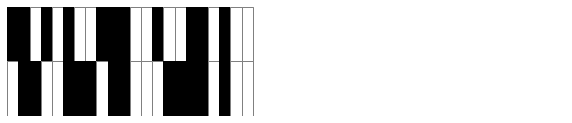

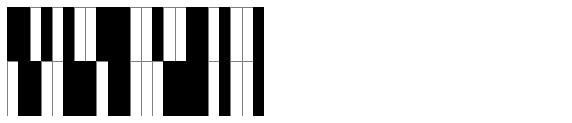

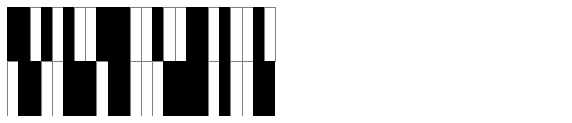

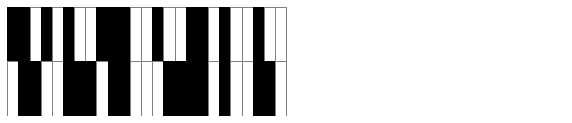

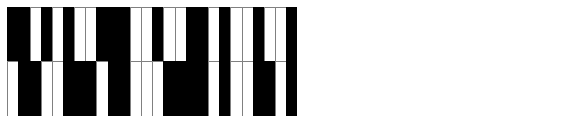

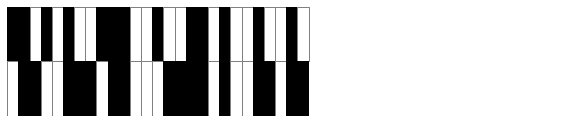

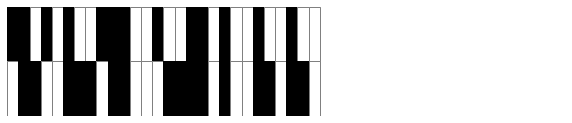

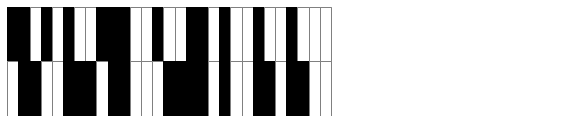

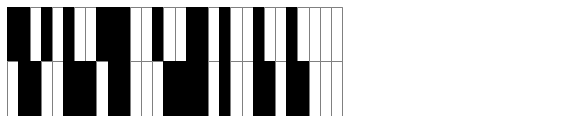

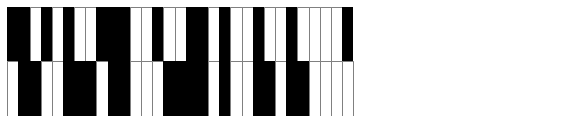

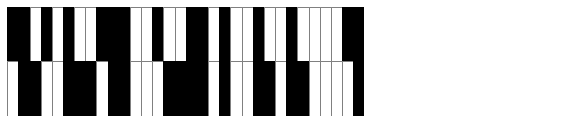

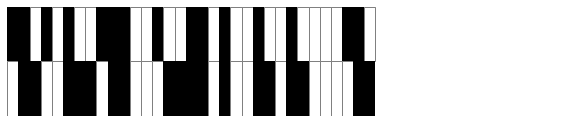

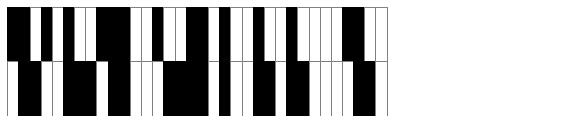

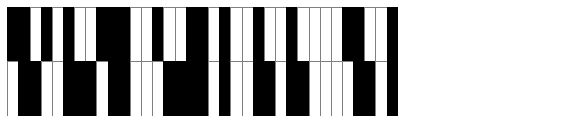

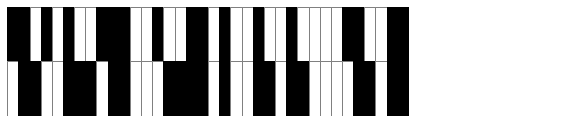

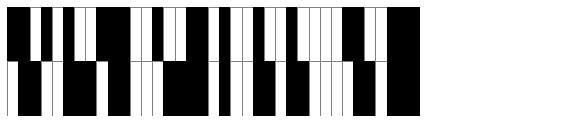

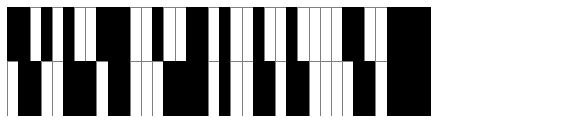

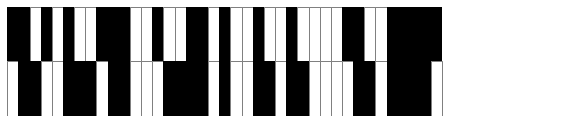

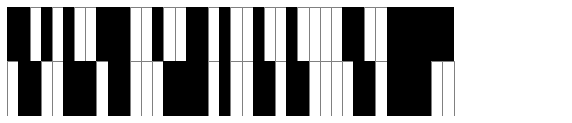

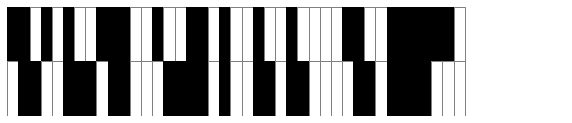

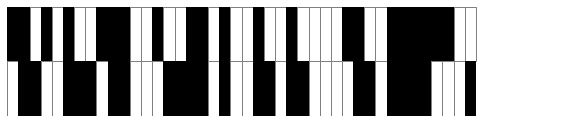

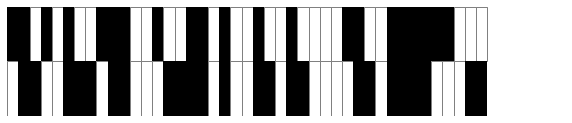

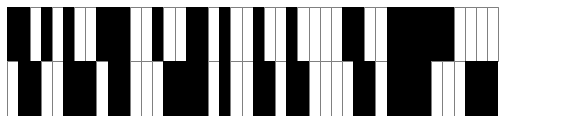

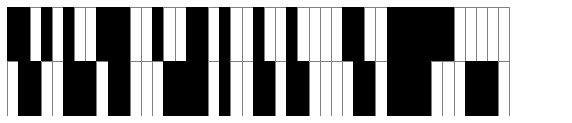

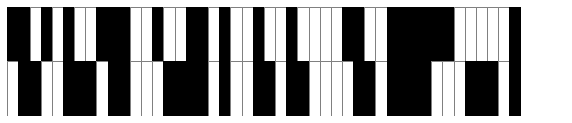

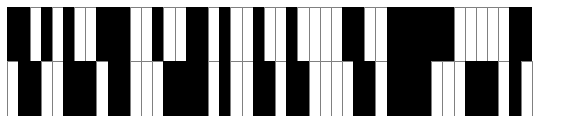

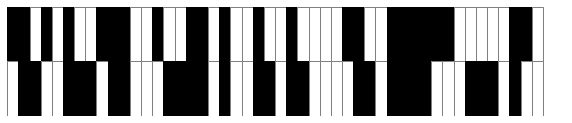

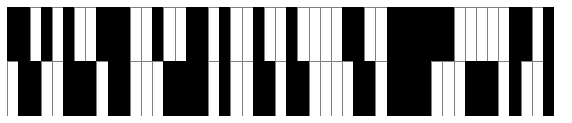

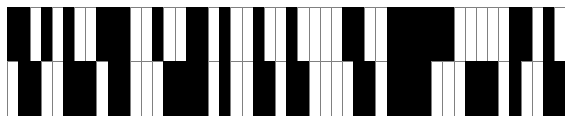

In [114]:
i = 0
for g in grupos:
    for r in range(50):
        ruta = pintar_ronda(data,grupo=i,hasta_ronda=r)
        if r < 10:
            ronda = '0' + str(r)
        else:
            ronda = str(r)
        archivo = ruta + '/ronda' + ronda + '.png'
        plt.savefig(archivo)
        
        
    
    
 
        
        
    i += 1

In [38]:
grupos = data['group'].unique().tolist()

In [39]:
df = data.groupby('group').get_group(grupos[6])
df.head()

,group,round,player,choice,attendance,score,ac_score
600,Grupo-0012,1,jugador2b,1,2,-1,-8
601,Grupo-0012,1,jugador2c,1,2,-1,-4
602,Grupo-0012,2,jugador2c,1,1,1,-4
603,Grupo-0012,2,jugador2b,0,1,0,-8
604,Grupo-0012,3,jugador2b,1,1,1,-8


In [40]:
df.groupby('player')['score'].sum().reset_index()

,player,score
0,jugador2b,-8
1,jugador2c,-4


Oops


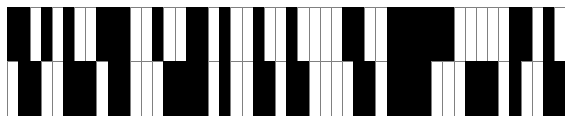

In [80]:
for i in range(52):
    pintar_ronda(data,grupo=6,hasta_ronda=i)
    sleep(.5)
    clear_output(wait=True)